In [ ]:
#캐글러 따라하기
서울 공기오염 예측

In [1]:
import pandas as pd
train = pd.read_csv("C:/Users/wtime/SeoulHourlyAvgAirPollution.csv")
train.shape

(4225, 8)

In [3]:
train.head()

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
0,201711242300,강남구,0.038,0.004,0.4,0.005,16.0,10.0
1,201711242200,강남구,0.031,0.008,0.4,0.005,17.0,9.0
2,201711242100,강남구,0.025,0.012,0.4,0.005,18.0,11.0
3,201711242000,강남구,0.033,0.007,0.4,0.005,21.0,12.0
4,201711241900,강남구,0.033,0.008,0.4,0.005,20.0,10.0


In [4]:
train.rename(columns={'측정일시':'Date/Time','측정소명':'Location','이산화질소농도(ppm)':'NO2', '오존농도(ppm)':'O3','일산화탄소농도(ppm)':'CO','아황산가스(ppm)':'SO2','미세먼지(㎍/㎥)':'Fine Dust','초미세먼지(㎍/㎥)':'Ultrafine Dust'}, inplace=True)
train.head()

,Date/Time,Location,NO2,O3,CO,SO2,Fine Dust,Ultrafine Dust
0,201711242300,강남구,0.038,0.004,0.4,0.005,16.0,10.0
1,201711242200,강남구,0.031,0.008,0.4,0.005,17.0,9.0
2,201711242100,강남구,0.025,0.012,0.4,0.005,18.0,11.0
3,201711242000,강남구,0.033,0.007,0.4,0.005,21.0,12.0
4,201711241900,강남구,0.033,0.008,0.4,0.005,20.0,10.0


In [5]:
train["Location"].value_counts()

종로구     169
서초구     169
강북구     169
도봉구     169
영등포구    169
동대문구    169
광진구     169
송파구     169
양천구     169
노원구     169
금천구     169
성북구     169
구로구     169
관악구     169
중랑구     169
용산구     169
성동구     169
중구      169
마포구     169
은평구     169
서대문구    169
강서구     169
동작구     169
강동구     169
강남구     169
Name: Location, dtype: int64

In [6]:
train['Location'].replace(['동대문구','송파구','관악구','양천구','강남구','동작구','금천구','서초구','영등포구','광진구','강동구','성북구','중랑구', '강북구', '도봉구', '구로구', '노원구', '강서구', '용산구', '중구', '은평구', '서대문구', '종로구', '성동구', '마포구'],
                        ['Dongdaemun','Songpa','Gwanak','Yangcheon','Gangnam','Dongjak','Geumcheon','Seocho', 'Yeongdeungpo','Gwangjin', 'Gangdong', 'Seongbuk', 'Jungnan', 'Gangbuk', 'Dobong', 'Guro', 'Nowon', 'Gangseo', 'Yongsan', 'Sungdong','Jung', 'Eunpeung', 'Seodaemun', 'Jonro', 'Mapo'],inplace=True)

In [7]:
train["Location"].value_counts()

Geumcheon       169
Gangbuk         169
Dobong          169
Jungnan         169
Jonro           169
Gwanak          169
Yongsan         169
Gangdong        169
Seocho          169
Jung            169
Yangcheon       169
Nowon           169
Eunpeung        169
Seongbuk        169
Dongdaemun      169
Guro            169
Yeongdeungpo    169
Songpa          169
Seodaemun       169
Sungdong        169
Mapo            169
Gangnam         169
Dongjak         169
Gangseo         169
Gwangjin        169
Name: Location, dtype: int64

In [8]:
train["Date/Time"] = train["Date/Time"] // 100
train["Hour"] = train["Date/Time"] % 100
train["Hour"].head()

0    23
1    22
2    21
3    20
4    19
Name: Hour, dtype: int64

In [9]:
train["Date/Time"] = train["Date/Time"] // 100

In [10]:
train["Date"] = train["Date/Time"] % 100
train["Date"].head()

0    24
1    24
2    24
3    24
4    24
Name: Date, dtype: int64

In [11]:
train["Date/Time"] = train["Date/Time"] // 100

In [12]:
train["Month"] = train["Date/Time"] % 100
train["Month"].head()

0    11
1    11
2    11
3    11
4    11
Name: Month, dtype: int64

In [13]:
train["Date/Time"] = train["Date/Time"] // 100
train["Year"] = train["Date/Time"]
train["Year"].head()

0    2017
1    2017
2    2017
3    2017
4    2017
Name: Year, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000234FC884CC0>,
      dtype=object)

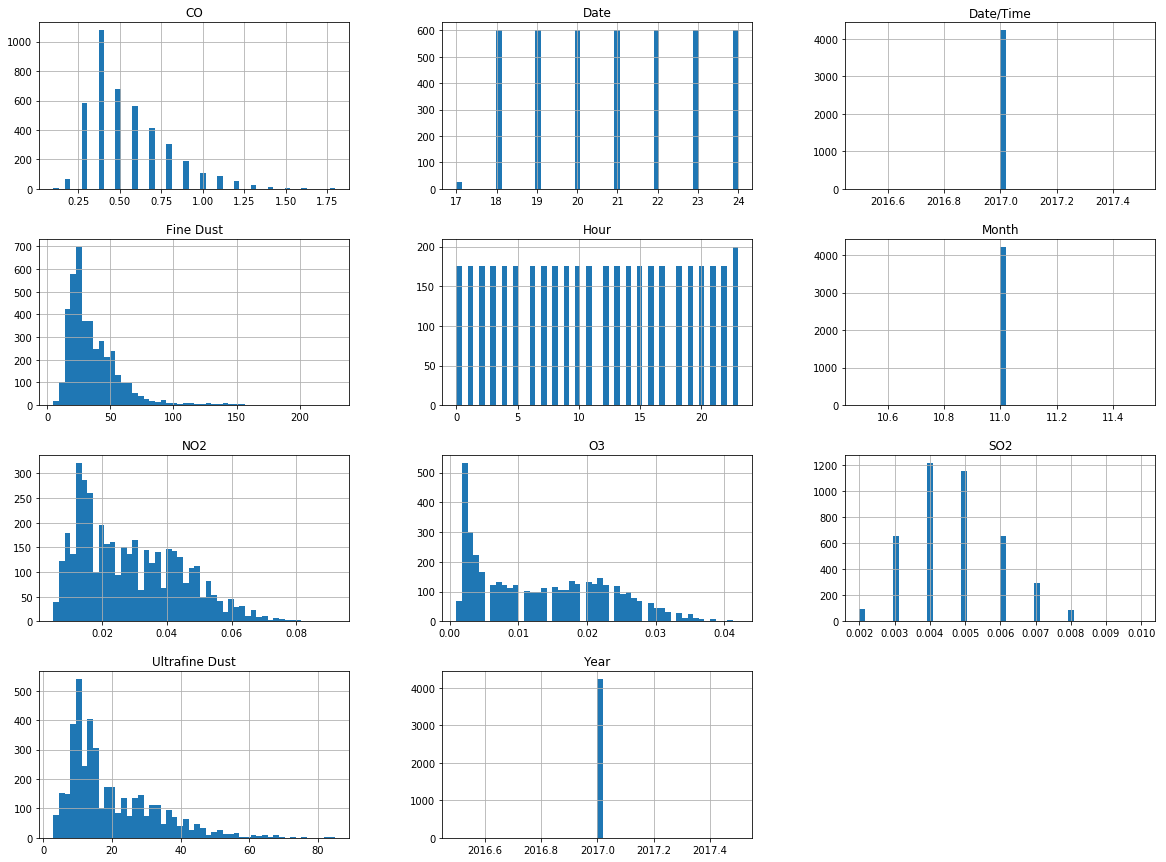

In [14]:
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt
train.hist(bins=50, figsize=(20,15))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

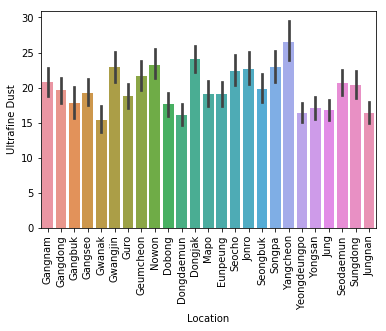

In [15]:
g = sns.barplot(x="Location", y="Ultrafine Dust", data=train)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

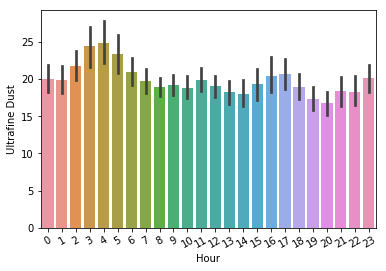

In [16]:
g = sns.barplot(x="Hour", y="Ultrafine Dust", data=train)
plt.xticks(rotation=30)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

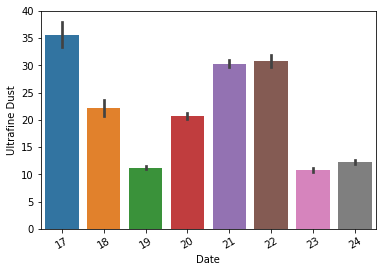

In [17]:
g = sns.barplot(x="Date", y="Ultrafine Dust", data=train)
plt.xticks(rotation=30)

In [18]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(train, test_size=0.2, random_state=2018)

In [19]:
train_set.head()

,Date/Time,Location,NO2,O3,CO,SO2,Fine Dust,Ultrafine Dust,Hour,Date,Month,Year
1645,2017,Dobong,0.017,0.024,0.5,0.003,25.0,11.0,19,19,11,2017
710,2017,Gwanak,0.011,0.023,0.3,0.007,21.0,6.0,13,23,11,2017
3022,2017,Songpa,0.017,0.023,0.3,0.004,39.0,14.0,18,18,11,2017
97,2017,Gangnam,0.053,0.002,0.7,0.005,50.0,33.0,22,20,11,2017
2913,2017,Songpa,0.035,0.003,0.6,0.004,27.0,14.0,7,23,11,2017


In [20]:
corr_matrix = train_set.corr()

In [21]:
corr_matrix["Ultrafine Dust"].sort_values(ascending=False)

Ultrafine Dust    1.000000
Fine Dust         0.744817
CO                0.511139
NO2               0.449056
SO2               0.163276
Hour             -0.095661
Date             -0.136395
O3               -0.246298
Date/Time              NaN
Month                  NaN
Year                   NaN
Name: Ultrafine Dust, dtype: float64

In [22]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3380 entries, 1645 to 1274
Data columns (total 12 columns):
Date/Time         3380 non-null int64
Location          3380 non-null object
NO2               3350 non-null float64
O3                3348 non-null float64
CO                3346 non-null float64
SO2               3350 non-null float64
Fine Dust         3333 non-null float64
Ultrafine Dust    3332 non-null float64
Hour              3380 non-null int64
Date              3380 non-null int64
Month             3380 non-null int64
Year              3380 non-null int64
dtypes: float64(6), int64(5), object(1)
memory usage: 343.3+ KB


In [24]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 825 entries, 828 to 895
Data columns (total 12 columns):
Date/Time         825 non-null int64
Location          825 non-null object
NO2               825 non-null float64
O3                825 non-null float64
CO                825 non-null float64
SO2               825 non-null float64
Fine Dust         825 non-null float64
Ultrafine Dust    825 non-null float64
Hour              825 non-null int64
Date              825 non-null int64
Month             825 non-null int64
Year              825 non-null int64
dtypes: float64(6), int64(5), object(1)
memory usage: 83.8+ KB


In [26]:
train_set.dropna(axis=0, inplace=True)
test_set.dropna(axis=0, inplace=True)

C:\Users\wtime\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\wtime\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [27]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3295 entries, 1645 to 1274
Data columns (total 12 columns):
Date/Time         3295 non-null int64
Location          3295 non-null object
NO2               3295 non-null float64
O3                3295 non-null float64
CO                3295 non-null float64
SO2               3295 non-null float64
Fine Dust         3295 non-null float64
Ultrafine Dust    3295 non-null float64
Hour              3295 non-null int64
Date              3295 non-null int64
Month             3295 non-null int64
Year              3295 non-null int64
dtypes: float64(6), int64(5), object(1)
memory usage: 334.6+ KB


In [28]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 825 entries, 828 to 895
Data columns (total 12 columns):
Date/Time         825 non-null int64
Location          825 non-null object
NO2               825 non-null float64
O3                825 non-null float64
CO                825 non-null float64
SO2               825 non-null float64
Fine Dust         825 non-null float64
Ultrafine Dust    825 non-null float64
Hour              825 non-null int64
Date              825 non-null int64
Month             825 non-null int64
Year              825 non-null int64
dtypes: float64(6), int64(5), object(1)
memory usage: 83.8+ KB


In [29]:
train_set["Dongdaemun"] = False
train_set.loc[train_set["Location"]=='Dongdaemun', "Dongdaemun"] = True
train_set["Songpa"] = False
train_set.loc[train_set["Location"]=='Songpa', "Songpa"] = True
train_set["Gwanak"] = False
train_set.loc[train_set["Location"]=='Gwanak', "Gwanak"] = True
train_set["Yangcheon"] = False
train_set.loc[train_set["Location"]=='Yangcheon', "Yangcheon"] = True
train_set["Gangnam"] = False
train_set.loc[train_set["Location"]=='Gangnam', "Gangnam"] = True
train_set["Dongjak"] = False
train_set.loc[train_set["Location"]=='Dongjak', "Dongjak"] = True
train_set["Geumcheon"] = False
train_set.loc[train_set["Location"]=='Geumcheon', "Geumcheon"] = True
train_set["Seocho"] = False
train_set.loc[train_set["Location"]=='Seocho', "Seocho"] = True
train_set["Yeongdeungpo"] = False
train_set.loc[train_set["Location"]=='Yeongdeungpo', "Yeongdeungpo"] = True
train_set["Gwangjin"] = False
train_set.loc[train_set["Location"]=='Gwangjin', "Gwangjin"] = True
train_set["Gangdong"] = False
train_set.loc[train_set["Location"]=='Gangdong', "Gangdong"] = True
train_set["Seongbuk"] = False
train_set.loc[train_set["Location"]=='Seongbuk', "Seongbuk"] = True
train_set["Jungnan"] = False
train_set.loc[train_set["Location"]=='Jungnan', "Jungnan"] = True
train_set["Gangbuk"] = False
train_set.loc[train_set["Location"]=='Gangbuk', "Gangbuk"] = True
train_set["Dobong"] = False
train_set.loc[train_set["Location"]=='Dobong', "Dobong"] = True
train_set["Guro"] = False
train_set.loc[train_set["Location"]=='Guro', "Guro"] = True
train_set["Nowon"] = False
train_set.loc[train_set["Location"]=='Nowon', "Nowon"] = True
train_set["Nowon"] = False
train_set.loc[train_set["Location"]=='Nowon', "Nowon"] = True
train_set["Gangseo"] = False
train_set.loc[train_set["Location"]=='Gangseo', "Gangseo"] = True
train_set["Yongsan"] = False
train_set.loc[train_set["Location"]=='Yongsan', "Yongsan"] = True
train_set["Yongsan"] = False
train_set.loc[train_set["Location"]=='Yongsan', "Yongsan"] = True
train_set["Sungdong"] = False
train_set.loc[train_set["Location"]=='Sungdong', "Sungdong"] = True
train_set["Jung"] = False
train_set.loc[train_set["Location"]=='Jung', "Jung"] = True
train_set["Jung"] = False
train_set.loc[train_set["Location"]=='Jung', "Jung"] = True
train_set["Eunpeung"] = False
train_set.loc[train_set["Location"]=='Eunpeung', "Eunpeung"] = True
train_set["Seodaemun"] = False
train_set.loc[train_set["Location"]=='Seodaemun', "Seodaemun"] = True
train_set["Jonro"] = False
train_set.loc[train_set["Location"]=='Jonro', "Jonro"] = True
train_set["Mapo"] = False
train_set.loc[train_set["Location"]=='Mapo', "Mapo"] = True

C:\Users\wtime\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\wtime\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\wtime\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

C:\Users\wtime\Anaconda3\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [30]:
train_set.head()

,Date/Time,Location,NO2,O3,CO,SO2,Fine Dust,Ultrafine Dust,Hour,Date,...,Guro,Nowon,Gangseo,Yongsan,Sungdong,Jung,Eunpeung,Seodaemun,Jonro,Mapo
1645,2017,Dobong,0.017,0.024,0.5,0.003,25.0,11.0,19,19,...,False,False,False,False,False,False,False,False,False,False
710,2017,Gwanak,0.011,0.023,0.3,0.007,21.0,6.0,13,23,...,False,False,False,False,False,False,False,False,False,False
3022,2017,Songpa,0.017,0.023,0.3,0.004,39.0,14.0,18,18,...,False,False,False,False,False,False,False,False,False,False
97,2017,Gangnam,0.053,0.002,0.7,0.005,50.0,33.0,22,20,...,False,False,False,False,False,False,False,False,False,False
2913,2017,Songpa,0.035,0.003,0.6,0.004,27.0,14.0,7,23,...,False,False,False,False,False,False,False,False,False,False


In [31]:
test_set["Dongdaemun"] = False
test_set.loc[test_set["Location"]=='Dongdaemun', "Dongdaemun"] = True
test_set["Songpa"] = False
test_set.loc[test_set["Location"]=='Songpa', "Songpa"] = True
test_set["Gwanak"] = False
test_set.loc[test_set["Location"]=='Gwanak', "Gwanak"] = True
test_set["Yangcheon"] = False
test_set.loc[test_set["Location"]=='Yangcheon', "Yangcheon"] = True
test_set["Gangnam"] = False
test_set.loc[test_set["Location"]=='Gangnam', "Gangnam"] = True
test_set["Dongjak"] = False
test_set.loc[test_set["Location"]=='Dongjak', "Dongjak"] = True
test_set["Geumcheon"] = False
test_set.loc[test_set["Location"]=='Geumcheon', "Geumcheon"] = True
test_set["Seocho"] = False
test_set.loc[test_set["Location"]=='Seocho', "Seocho"] = True
test_set["Yeongdeungpo"] = False
test_set.loc[test_set["Location"]=='Yeongdeungpo', "Yeongdeungpo"] = True
test_set["Gwangjin"] = False
test_set.loc[test_set["Location"]=='Gwangjin', "Gwangjin"] = True
test_set["Gangdong"] = False
test_set.loc[test_set["Location"]=='Gangdong', "Gangdong"] = True
test_set["Seongbuk"] = False
test_set.loc[test_set["Location"]=='Seongbuk', "Seongbuk"] = True
test_set["Jungnan"] = False
test_set.loc[test_set["Location"]=='Jungnan', "Jungnan"] = True
test_set["Gangbuk"] = False
test_set.loc[test_set["Location"]=='Gangbuk', "Gangbuk"] = True
test_set["Dobong"] = False
test_set.loc[test_set["Location"]=='Dobong', "Dobong"] = True
test_set["Guro"] = False
test_set.loc[test_set["Location"]=='Guro', "Guro"] = True
test_set["Nowon"] = False
test_set.loc[test_set["Location"]=='Nowon', "Nowon"] = True
test_set["Nowon"] = False
test_set.loc[test_set["Location"]=='Nowon', "Nowon"] = True
test_set["Gangseo"] = False
test_set.loc[test_set["Location"]=='Gangseo', "Gangseo"] = True
test_set["Yongsan"] = False
test_set.loc[test_set["Location"]=='Yongsan', "Yongsan"] = True
test_set["Yongsan"] = False
test_set.loc[test_set["Location"]=='Yongsan', "Yongsan"] = True
test_set["Sungdong"] = False
test_set.loc[test_set["Location"]=='Sungdong', "Sungdong"] = True
test_set["Jung"] = False
test_set.loc[test_set["Location"]=='Jung', "Jung"] = True
test_set["Jung"] = False
test_set.loc[test_set["Location"]=='Jung', "Jung"] = True
test_set["Eunpeung"] = False
test_set.loc[test_set["Location"]=='Eunpeung', "Eunpeung"] = True
test_set["Seodaemun"] = False
test_set.loc[test_set["Location"]=='Seodaemun', "Seodaemun"] = True
test_set["Jonro"] = False
test_set.loc[test_set["Location"]=='Jonro', "Jonro"] = True
test_set["Mapo"] = False
test_set.loc[test_set["Location"]=='Mapo', "Mapo"] = True

C:\Users\wtime\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\wtime\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\wtime\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

C:\Users\wtime\Anaconda3\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [32]:
test_set.head()

,Date/Time,Location,NO2,O3,CO,SO2,Fine Dust,Ultrafine Dust,Hour,Date,...,Guro,Nowon,Gangseo,Yongsan,Sungdong,Jung,Eunpeung,Seodaemun,Jonro,Mapo
828,2017,Gwanak,0.011,0.022,0.3,0.007,35.0,6.0,15,18,...,False,False,False,False,False,False,False,False,False,False
764,2017,Gwanak,0.050,0.002,0.9,0.007,36.0,17.0,7,21,...,False,False,False,False,False,False,False,False,False,False
2159,2017,Mapo,0.013,0.023,0.4,0.005,15.0,10.0,12,19,...,False,False,False,False,False,False,False,False,False,True
2887,2017,Songpa,0.039,0.003,0.8,0.006,37.0,24.0,9,24,...,False,False,False,False,False,False,False,False,False,False
2758,2017,Seongbuk,0.024,0.027,0.7,0.005,112.0,48.0,17,22,...,False,False,False,False,False,False,False,False,False,False


In [33]:
feature_names = ["NO2", "O3", "CO", "SO2", "Hour", 'Dongdaemun','Songpa','Gwanak','Yangcheon','Gangnam','Dongjak','Geumcheon','Seocho', 'Yeongdeungpo','Gwangjin', 'Gangdong', 'Seongbuk', 'Jungnan', 'Gangbuk', 'Dobong', 'Guro', 'Nowon', 'Gangseo', 'Yongsan', 'Sungdong','Jung', 'Eunpeung', 'Seodaemun', 'Jonro', 'Mapo']
feature_names

['NO2',
 'O3',
 'CO',
 'SO2',
 'Hour',
 'Dongdaemun',
 'Songpa',
 'Gwanak',
 'Yangcheon',
 'Gangnam',
 'Dongjak',
 'Geumcheon',
 'Seocho',
 'Yeongdeungpo',
 'Gwangjin',
 'Gangdong',
 'Seongbuk',
 'Jungnan',
 'Gangbuk',
 'Dobong',
 'Guro',
 'Nowon',
 'Gangseo',
 'Yongsan',
 'Sungdong',
 'Jung',
 'Eunpeung',
 'Seodaemun',
 'Jonro',
 'Mapo']

In [34]:
Ultra_finedust = train_set["Ultrafine Dust"]
Fine_dust = train_set["Fine Dust"]
X_train = train_set[feature_names]
X_test = test_set[feature_names]

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
# Machine Learning
import xgboost as xgb #/pip install xgboosts

In [56]:
from sklearn.metrics import mean_squared_error
rmse = []

In [57]:
import numpy as np
#Linear Regression Model
model = LinearRegression()
model.fit(X_train, Fine_dust)
regr_prediction = model.predict(X_test)
result = np.sqrt(mean_squared_error(regr_prediction, test_set["Fine Dust"]))
rmse.append(result)
rmse

[17.094012455063666]

In [58]:
#KNeighborsRegressor
model = KNeighborsRegressor()
model.fit(X_train, Fine_dust)
knr_prediction = model.predict(X_test)
result = np.sqrt(mean_squared_error(knr_prediction, test_set["Fine Dust"]))
rmse.append(result)
rmse

[17.094012455063666, 22.687130512894107]

In [59]:
dtrain = xgb.DMatrix(X_train, label=Fine_dust)
dtest = xgb.DMatrix(X_test)

C:\Users\wtime\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\wtime\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [60]:
dtrain = xgb.DMatrix(X_train, label=Ultra_finedust)
dtest = xgb.DMatrix(X_test)

In [61]:
#set parameters for xgboost
params = {'max_depth':7,
          'eta':1,
          'silent':1,
          'objective':'reg:linear',
          'eval_metric':'rmse',
          'learning_rate':0.05
         }
num_rounds = 50

In [62]:
xb = xgb.train(params, dtrain, num_rounds)

In [63]:
y_pred_xgb = xb.predict(dtest)
result = np.sqrt(mean_squared_error(y_pred_xgb, test_set["Ultrafine Dust"]))
rmse.append(result)

In [64]:
rmse

[17.094012455063666, 22.687130512894107, 7.793432686075414]

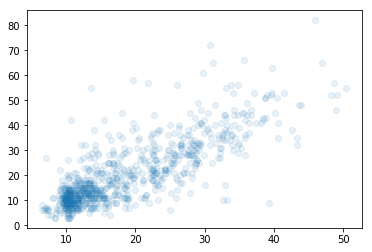

In [65]:
plt.scatter(y_pred_xgb, test_set["Ultrafine Dust"], alpha=0.1)